# Introdução

    Este caderno tem como objetivo analisar os dados de acidentes de trânsito na cidade do Recife, utilizando técnicas básicas de data visualization, com ênfase nos acidentes com vítimas fatais. 
    
    Todos os passos e funções serão explicadas individualmente para que todos possam entender a lógica por trás dos comandos. 
    Este caderno será aprimorado e atualizado com o tempo. 
    
     Visualizando os dados de acidentes que ocorreram na cidade do Recife entre 2016 e 2019, podemos tirar as seguintes conclusões:
      1 - Colisões representam 69,3% dos acidentes de trânsito, e que consequentemente causa o maior número  absoluto de vítimas.
      2 - Os atropelamentos representam somente 2,1% das vítimas de trânsito, porem são responsáveis por 31,9% das mortes.
      3 - Fenômeno similar às colisões com ciclistas: representam 1,3% dos acidentes, porém são responsáveis por 11,5% das mortes.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importando os dados

    Todos os dados foram adquiridos do Portal de Dados Abertos da Prefeitura do Recife (http://dados.recife.pe.gov.br/). No momento da aquisição, os dados disponíveis são referentes aos anos de 2015 a 2019. A importação dos dados foi realizada diretamente da minha máquina. Em breve adicionarei um seção explicando como fazer a aquisição dos dados via API do Portal de Dados.

In [3]:
#importando dados a partir de arquivos .csv, utilizando a função read_csv() do pacote 'pandas'. 
#Note que para importar as planilhas referentes aos anos de 2015 a 2018, foi necessário acrescenter o argumento 'sep = ';''
#Este argumento informa à função que o símbolo de ponto e vírgula é utilizado para separar os dados da colunas.
#O default deste argumento é a vírgula, que foi utilizada no .csv dos dados de 2019

acidentes2019 = pd.read_csv("~/Downloads/acidentes_2019.csv")
acidentes2018 = pd.read_csv("~/Downloads/acidentes_2018.csv", sep = ';')   #
acidentes2017 = pd.read_csv("~/Downloads/acidentes_2017.csv", sep = ';')   # 
acidentes2016 = pd.read_csv("~/Downloads/acidentes_2016.csv", sep = ';')   # 
acidentes2015 = pd.read_csv("~/Downloads/acidentes_2015.csv", sep = ';')   #

# Construindo o dataframe

In [4]:
#Uma rápida inspecionada nas colunas de cada .csv para termos uma ideia do conteúdo de cada usando a função print()

print("Dados de 2019", acidentes2019.columns)
print("Dados de 2018", acidentes2018.columns)
print("Dados de 2017", acidentes2017.columns)
print("Dados de 2016", acidentes2016.columns)
print("Dados de 2015", acidentes2015.columns)  

Dados de 2019 Index(['_id', 'DATA', 'hora', 'natureza_acidente', 'situacao', 'bairro',
       'endereco', 'numero', 'detalhe_endereco_acidente', 'complemento',
       'endereco_cruzamento', 'numero_cruzamento', 'referencia_cruzamento',
       'bairro_cruzamento', 'num_semaforo', 'sentido_via', 'tipo', 'descricao',
       'auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao',
       'viatura', 'outros', 'vitimas', 'vitimasfatais', 'acidente_verificado',
       'tempo_clima', 'situacao_semaforo', 'sinalizacao', 'condicao_via',
       'conservacao_via', 'ponto_controle', 'situacao_placa',
       'velocidade_max_via', 'mao_direcao', 'divisao_via1', 'divisao_via2',
       'divisao_via3'],
      dtype='object')
Dados de 2018 Index(['DATA', 'hora', 'natureza_acidente', 'situacao', 'bairro', 'endereco',
       'numero', 'detalhe_endereco_acidente', 'complemento',
       'endereco_cruzamento', 'numero_cruzamento', 'referencia_cruzamento',
       'bairro_cruzamento', 'num_semafo

In [157]:
#Note que o .csv referente a 2015 não contém os dados sobre vítimas fatais (coluna 'vitimasfatais' presente nos outros dataframes)

#Inicialmente criamos um array contendo o nome das colunas (features) de interesse
features = ['tipo', 'vitimas', 'vitimasfatais']

#Montamos o dataframe final 'acidentes', contendo somente as features de interesse de cada .csv. Visto que acidentes_2015
#não tem a coluna de vítimas fatais, os dados deste ano não foram inclídos no dataframe final.
#A função do pandas concat() por default, concatena dataframes "um abaixo do outro".
acidentes = pd.concat([acidentes2019[features], acidentes2018[features], acidentes2017[features], acidentes2016[features]])

#Acessando o atributo .shape do nosso dataframe final podemos verificar quantas linhas e colunas possui.
print('Nosso data frame final possui {} linhas e {} colunas'.format(acidentes.shape[0], acidentes.shape[1]))

Nosso data frame final possui 46494 linhas e 3 colunas


    As features escolhidas são:
        - tipo: mostra o tipo de acidente de cada registro.
        - vitimas: contabiliza o número de vítimas, fatais ou não, envolvidas no acidente.
        - vitimasfatais: contabiliza o número de vítimas fatais envolvidas no acidente.

In [158]:
#A função info() sumariza os dados do dataframe, mostrando o tipo de dados de cada coluna, e quantos dados
#não-nulos cada coluna possui. Podemos ver baixo que na coluna tipo existes somente um registre sem o tipo de acidente
#As outras colunas possuem valores nulos, mas estes podem permanecer como estão.
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46494 entries, 0 to 11262
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tipo           46493 non-null  object 
 1   vitimas        46272 non-null  float64
 2   vitimasfatais  129 non-null    float64
dtypes: float64(2), object(1)
memory usage: 1.4+ MB


In [159]:
#Retirar o único registro com o tipo faltante usando a função dropna()
acidentes.dropna(axis = 'index', subset = ['tipo'], inplace = True)
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46493 entries, 0 to 11262
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tipo           46493 non-null  object 
 1   vitimas        46271 non-null  float64
 2   vitimasfatais  129 non-null    float64
dtypes: float64(2), object(1)
memory usage: 1.4+ MB


In [160]:
#Vamos agora ver quais categorias de acidentes foram preenchidas na coluna 'tipo'.
#Primeiro selecionamos a coluna 'tipo', e usamos a função unique(), que mostra as categorias de dados presente na coluna

acidentes['tipo'].unique()

array(['COLISÃO TRASEIRA', 'ABALROAMENTO TRANSVERSAL', 'COLISÃO',
       'COLISÃO COM CICLISTA', 'COLISÃO FRONTAL', 'CHOQUE OBJETO FIXO',
       'CHOQUE VEÍCULO PARADO', 'ATROPELAMENTO',
       'ABALROAMENTO LONGITUDINAL', 'ACID. DE PERCURSO', 'TOMBAMENTO',
       'SUBURBIO', 'CHOQUE', 'CAPOTAMENTO', 'ENGAVETAMENTO',
       'ATROPELAMENTO ANIMAL', '0', 'SANTO AMARO', 'NATUREZA', 'COLISAO'],
      dtype=object)

In [161]:
#As categorias de acidente são definidas pelo Departamento Nacional de Trânsito (DENATRAN), algumas das categorias acima não se encaixam:
#SANTO AMARO na verdade é um bairro da cidade. 'NATUREZA' não está claro, e dos quase 50 mil registros, só existe um com esta categoria.
#E finalmente um registro com 'SUBURBIO', que não é um tipo de acidente, e outro com '0'. 
#Esses registros errados serão exlcuidos do dataframe usando a função drop(). O argumento 'inplace' como True para aplicar esta modificação no dataframe.

acidentes.drop(acidentes[acidentes["tipo"]=='SUBURBIO'].index, inplace = True)
acidentes.drop(acidentes[acidentes["tipo"]=='SANTO AMARO'].index, inplace = True)
acidentes.drop(acidentes[acidentes["tipo"]== '0'].index, inplace = True)
acidentes.drop(acidentes[acidentes["tipo"]== 'NATUREZA'].index, inplace = True)

acidentes.tipo.unique()

array(['COLISÃO TRASEIRA', 'ABALROAMENTO TRANSVERSAL', 'COLISÃO',
       'COLISÃO COM CICLISTA', 'COLISÃO FRONTAL', 'CHOQUE OBJETO FIXO',
       'CHOQUE VEÍCULO PARADO', 'ATROPELAMENTO',
       'ABALROAMENTO LONGITUDINAL', 'ACID. DE PERCURSO', 'TOMBAMENTO',
       'CHOQUE', 'CAPOTAMENTO', 'ENGAVETAMENTO', 'ATROPELAMENTO ANIMAL',
       'COLISAO'], dtype=object)

# Analisando os dados

Text(0, 0.5, 'Nº de acidentes')

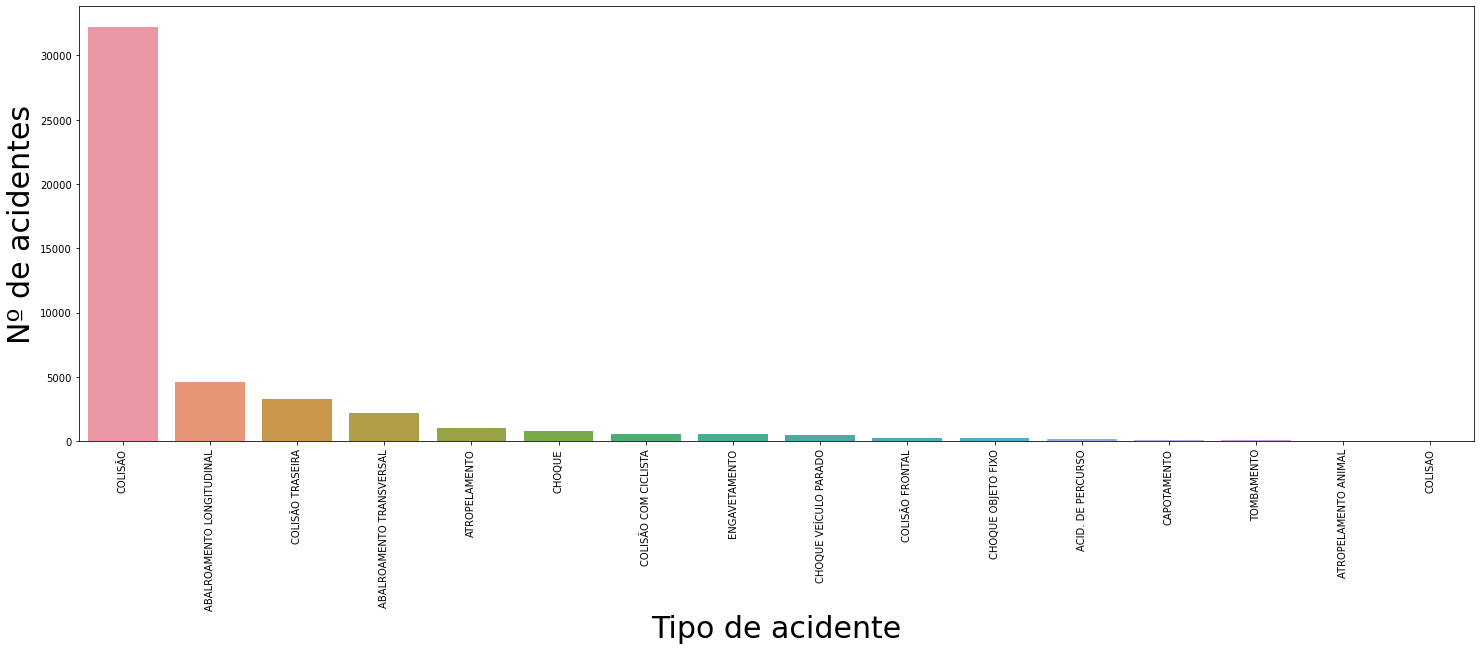

In [162]:
#Para se ter uma ideia geral dos acidentes em Recife, plotamos um gráfico de barra mostrando o número de acidentes por cada tipo.

plt.figure(figsize=(25, 8))  #primeiro definimos o tamanho do nosso gráfico com a função figure() do módulo pyplot da biblioteca matplotlib
plt.xticks(rotation=90)      #Vamos girar os labels em 90º para que que mais legível
barra = sns.countplot(x = "tipo", data = acidentes, order = acidentes["tipo"].value_counts().index)
plt.xlabel('Tipo de acidente', size = 30)
plt.ylabel('Nº de acidentes', size = 30)
#A função countplot() do pacote seaborn

In [163]:
vitimas =  acidentes.groupby(['tipo']).describe()['vitimas']['count']
vitimas_org = vitimas.sort_values(ascending = False)
vitimas_org

tipo
COLISÃO                      32063.0
ABALROAMENTO LONGITUDINAL     4569.0
COLISÃO TRASEIRA              3242.0
ABALROAMENTO TRANSVERSAL      2155.0
ATROPELAMENTO                  963.0
CHOQUE                         783.0
COLISÃO COM CICLISTA           574.0
ENGAVETAMENTO                  546.0
CHOQUE VEÍCULO PARADO          470.0
COLISÃO FRONTAL                280.0
CHOQUE OBJETO FIXO             249.0
ACID. DE PERCURSO              148.0
CAPOTAMENTO                     97.0
TOMBAMENTO                      72.0
ATROPELAMENTO ANIMAL            31.0
COLISAO                          7.0
Name: count, dtype: float64

Text(0, 0.5, 'Nº de vítimas')

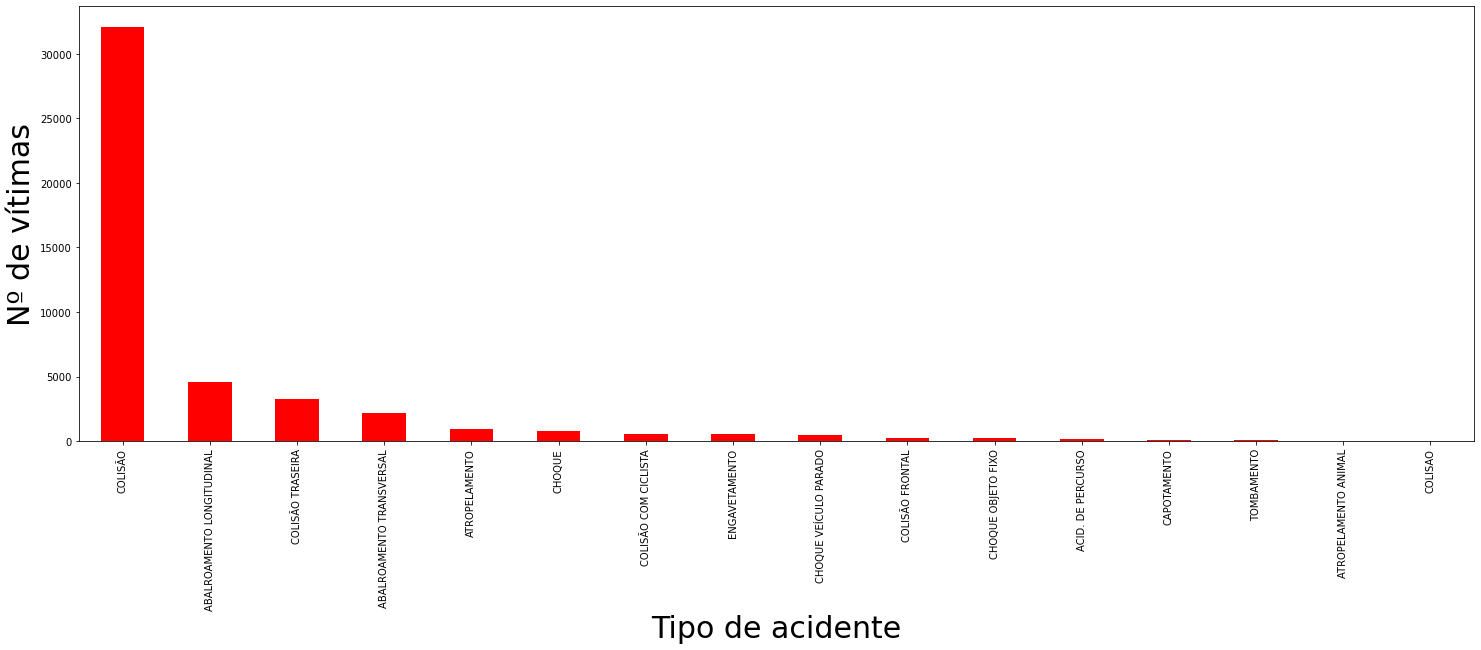

In [164]:
#Como esperado, o número de vítimas acompanha a frequência de cada tipo de acidente
plt.figure(figsize=(25, 8))
vitimas_org.plot(kind = 'bar', color = 'red')
plt.xlabel('Tipo de acidente', size = 30)
plt.ylabel('Nº de vítimas', size = 30)

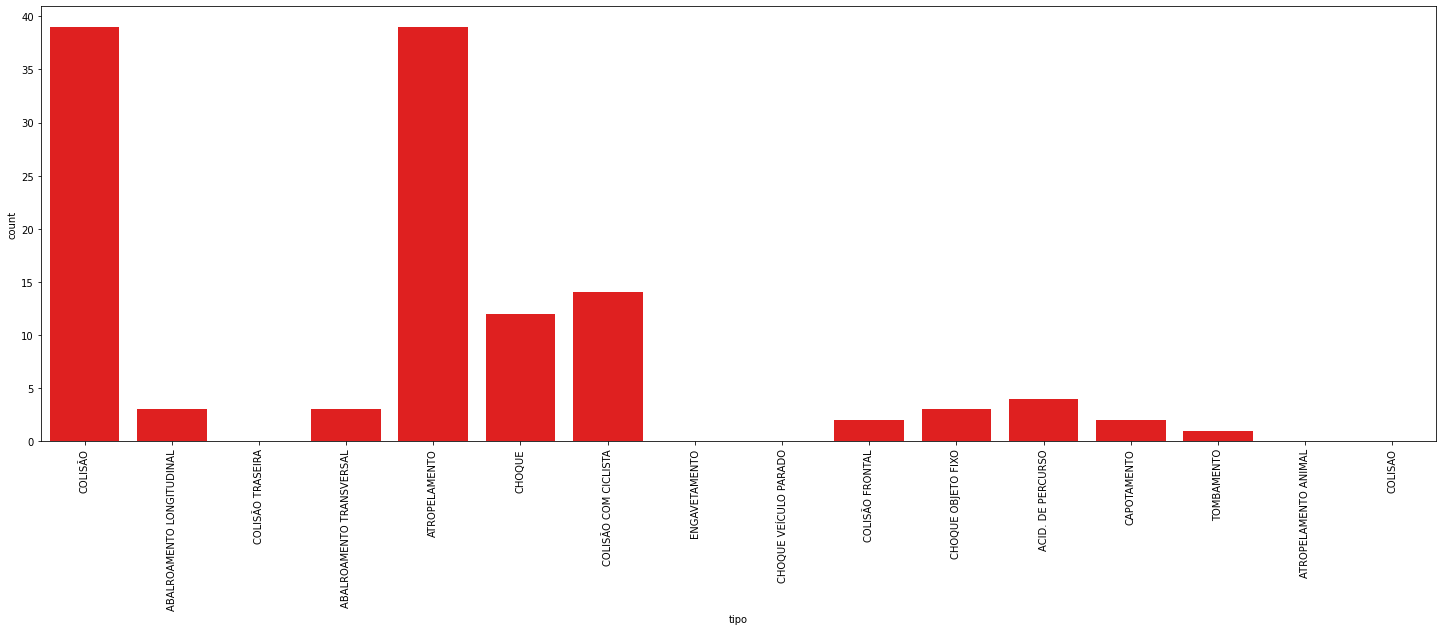

In [165]:
#Podemos então plotar em um gráfico mostrando o número de vítimas fatais para cada tipo de acidente.
#Alguns possuem zero vítimas fatais entre 2016 e 2019, enquanto que colisão, atropelamento, colisão com ciclista
#e choque possuem o maior número de vítimas fatais.

acidentes["vitimasfatais"].fillna(0, inplace=True)
acidentes["vitimasfatais"]

plt.figure(figsize=(25, 8))
plt.xticks(rotation=90)
barra2 = sns.countplot(x = "tipo", data = acidentes[acidentes.vitimasfatais == 1], color = "red", order = acidentes["tipo"].value_counts().index)

In [171]:
#É interessante notar que o número de vítimas fatais não é um reflexo do número de acidentes de cada tipo.
#Analisando numericamente temos a porcentagem de de acidentes por tipo:

acidentes['tipo'].value_counts(normalize = True)*100

COLISÃO                      69.297811
ABALROAMENTO LONGITUDINAL     9.845273
COLISÃO TRASEIRA              6.980998
ABALROAMENTO TRANSVERSAL      4.641804
ATROPELAMENTO                 2.145516
CHOQUE                        1.719426
COLISÃO COM CICLISTA          1.261056
ENGAVETAMENTO                 1.177129
CHOQUE VEÍCULO PARADO         1.011427
COLISÃO FRONTAL               0.602552
CHOQUE OBJETO FIXO            0.540145
ACID. DE PERCURSO             0.327100
CAPOTAMENTO                   0.210893
TOMBAMENTO                    0.157094
ATROPELAMENTO ANIMAL          0.066711
COLISAO                       0.015064
Name: tipo, dtype: float64

In [170]:
#A porcentagem de vítimas fatais por tipo de acidente.

acidentes[acidentes['vitimasfatais']==1]['tipo'].value_counts(normalize = True)*100

ATROPELAMENTO                31.967213
COLISÃO                      31.967213
COLISÃO COM CICLISTA         11.475410
CHOQUE                        9.836066
ACID. DE PERCURSO             3.278689
ABALROAMENTO LONGITUDINAL     2.459016
ABALROAMENTO TRANSVERSAL      2.459016
CHOQUE OBJETO FIXO            2.459016
CAPOTAMENTO                   1.639344
COLISÃO FRONTAL               1.639344
TOMBAMENTO                    0.819672
Name: tipo, dtype: float64

In [169]:
tipos = acidentes['tipo'].value_counts()
fatais = acidentes[acidentes['vitimasfatais']==1]['tipo'].value_counts()

#Com um loop podemos criar um series do pandas com a porcentagem de vítimas fatais para cada tipo de acidente

porcentagem = pd.Series([], dtype = 'float')           #primeiro criamos uma série vazia

for i in fatais.index:                                 #vamos preencher a série com este loop
    a  = (fatais[i] / tipos[i]) * 100             
    b = pd.Series([a], index = [i])
    porcentagem = porcentagem.append(b)

porcen = pd.DataFrame(porcentagem)
porcen.rename(columns = {0 : 'TIPO'}, inplace = True)
porcen

,TIPO
ATROPELAMENTO,3.911735
COLISÃO,0.121110
COLISÃO COM CICLISTA,2.389078
CHOQUE,1.501877
ACID. DE PERCURSO,2.631579
ABALROAMENTO LONGITUDINAL,0.065574
ABALROAMENTO TRANSVERSAL,0.139082
CHOQUE OBJETO FIXO,1.195219
CAPOTAMENTO,2.040816
COLISÃO FRONTAL,0.714286


<BarContainer object of 11 artists>

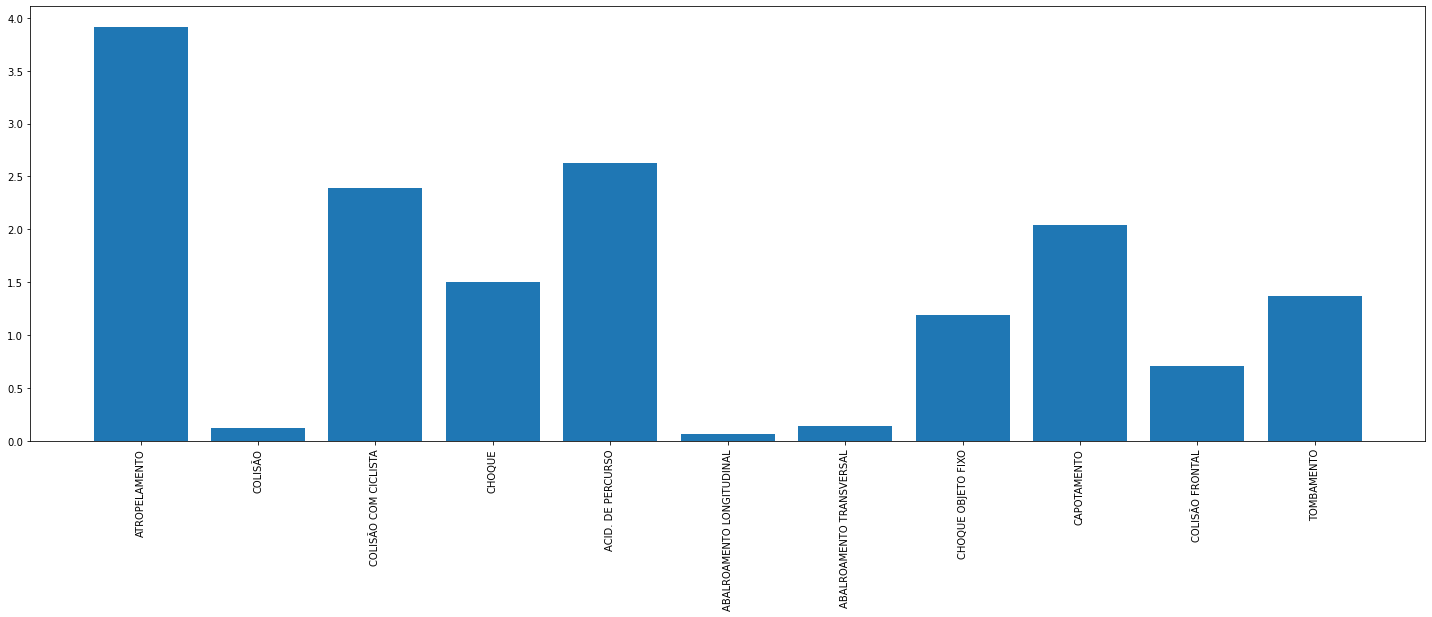

In [112]:
#Plotando a porcentagem e acidentes com vítimas fatais para cada tipo de acidente
#notamos que 'atropelamento', por mais que sua ocorrência seja baixa, a proporção de mortes causadas é a maior
#seguido de 'acidente de percurso' e 'colisão com ciclista'
plt.figure(figsize=(25, 8))
plt.xticks(rotation=90)
plt.bar(porcen.index, porcen['TIPO'])

# Conclusões

    Visualizando os dados de acidentes que ocorreram na cidade do Recife entre 2016 e 2019, podemos tirar as seguintes conclusões:
      1 - Colisões representam 69,3% dos acidentes de trânsito, e que consequentemente causa o maior número  absoluto de vítimas.
      2 - Os atropelamentos representam somente 2,1% das vítimas de trânsito, porem são responsáveis por 31,9% das mortes.
      3 - Fenômeno similar às colisões com ciclistas: representam 1,3% dos acidentes, porém são responsáveis por 11,5% das mortes.